Following this tutorial: https://zindi.africa/learn/spot-the-mask-challenge-tutorial-a-deep-learning-approach

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Keras is a deep learning framework built for Python which provides methods to train deep learning models. Keras has built-in support for CNNs (for computer vision) and has a user-friendly API that makes it easy to quickly prototype deep learning models.

Importing the sequential method, means that all the layers in the model will be arranged in sequence. The importance of ImageDataGenerator is to generate batches of tensor image data with real-time data augmentation. It has very many useful functions such as rescaling, rotating, zooming etc.

The keras.layers import gives us access to layers that we need to build our CNN which are described above. Layers are the building blocks of neural networks.

Optimizers are necessary for improving your model speed and performance. Optimizers shape the model into its most accurate form by playing with model weights.

VGG16 is a convolutional neural network architecture which provides 16 layers. Its a pretrained model. VGG16 is a model employs the transfer learning architecture. Transfer learning is the art of reusing a model on one task and repurposing it on another task.

Pandas library provides built-in methods for data manipulation.

Matplotlib is used for creating graphs where necessary when building our model.

The IPython.display imports a method for viewing images within the notebook.

In [10]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
from IPython.display import Image as ShowImage
# Keras libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization,GlobalMaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.models import Model

In [15]:
# Reading the data
train_labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/train_labels.csv")

# Show the first 5 rows
train_labels.head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1


<Axes: >

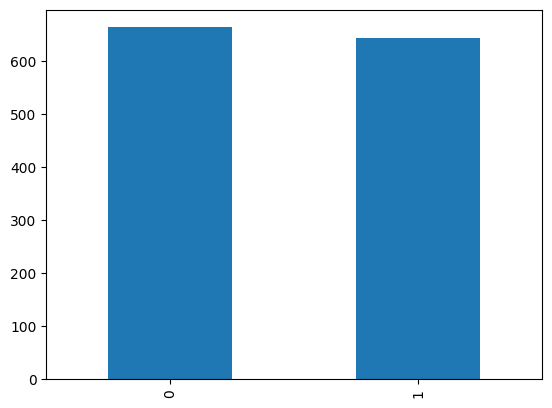

In [7]:
train_labels['target'].value_counts().plot.bar()

In [8]:
train_labels['target'].value_counts()

0    664
1    644
Name: target, dtype: int64

In [10]:
# Extracting the zip file
!unzip -q "/content/drive/My Drive/Colab Notebooks/Data/images.zip" -d "/content/drive/My Drive//Colab Notebooks/Data/"

replace /content/drive/My Drive//Colab Notebooks/Data/images/wiovvusmzmxindaealykgesxwwleql.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/My Drive//Colab Notebooks/Data/images/uxykipqshvpliunxlldynrpskpdzeu.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/My Drive//Colab Notebooks/Data/images/kpcznzbgvgwliaqhkcrwsusssykqvs.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


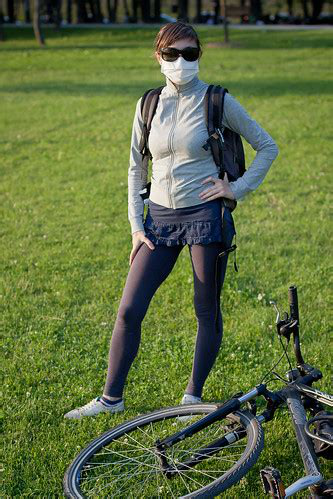

In [9]:
# We can view the images with the ShowImage functionality
ShowImage("/content/drive/My Drive/Colab Notebooks/Data/images/aadawlxbmapqrblgxyzarhjasgiobu.png")

If you found this fun, you can also use the OpenCV Library to view images!

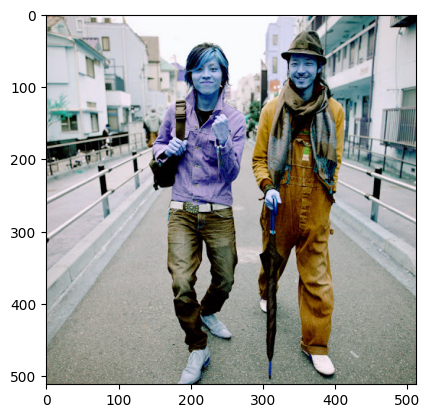

In [10]:
import cv2
import random
import os

# This stores the location of the data source
data = os.listdir("/content/drive/My Drive/Colab Notebooks/Data/images")

# Picking random sample from data list
sample = random.choice(data)

# The imread method loads image from the sprcified file
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/Data/images/"+sample)

# The cmap parameter displays the image in gray
plt.imshow(img, cmap="gray")

Sample_submission.csv

This is the file that is used for making submissions after you have created your model.

We should replace the target variables (0,1) into categories (mask, unmask) using the replace method.

In [11]:
train_labels["target"] = train_labels["target"].replace({0: 'unmask', 1: 'mask'})

## Instantiating the CNN

First, we need to declare how the image data will be passed to the input layer.

In [41]:
# Defining how data is passed to the input layer
image_size = 224
input_shape = (image_size, image_size, 3)
batch_size = 16

As mentioned earlier, convnets take input tensors of the shape - image height, image width and image channels. The images’ input shape from the code above is (224,224,3).

In [42]:
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = GlobalMaxPooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 0s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Here we are passing our parameters on to our VGG16.

The include_top parameter states whether to include the output layers or not. In case you are fitting your model into your own problem, you don't need it.

The weights parameter specifies what weights to load.

GlobalMaxPooling2D - this is another pooling type where the pooling size is set to equal the input size, so that the max of the entire input is connected as the output value.

Dense implements the operation using the ReLU and Softmax algorithm respectively.

The model compile method defines the model by specifying the optimiser, loss and metrics.

The loss parameter is specified to type 'binary_crossentropy'. This measures how the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

An optimiser is the mechanism through which the network will update itself based on the data it sees and its loss function. The metrics parameter is set to 'accuracy' - here we only care about how the model will perform.

The optimiser is set to Stochastic Gradient Descent Optimiser. This refers to the mechanism through which the network will update itself based on the data it sees and its loss function.

The model summary method is used to see all parameters and shapes in each layers in our models, which will give you the following result:

```
The total parameters are 14,978,370

The trainable parameters are 7,343,106

The non-trainable parameters are 7,635,264
```

In [23]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

Earlystop is a technique that is used to reduce overfitting without comprising on model accuracy. Too many epochs can lead to overfitting, hence the need to apply the technique.

An epoch means training the network with all the training data for one cycle. A forward pass and a backward pass are counted as one pass.

ReduceLROnPlateau is a callback to reduce the learning rate when a metric has stopped improving.

Patience is the number of epochs with no improvement after which the learning rate is reduced.

In [13]:
from sklearn.model_selection import train_test_split

train_df,validate_df=train_test_split(train_labels,test_size=0.2,random_state=42)

train_df = train_df.reset_index(drop='True')

validate_df = validate_df.reset_index(drop='True')

Here, we are importing the train_test_split method from sklearn that basically splits the training data into two separate dataframes - the training and the testing data. random_state parameter sets the seed to the random generator so that your train-test splits are always deterministic.

Next, we need to categorically encode categorical variables:

In [14]:
# Generate batches of tensor image data with real-time data augmentation
from keras.preprocessing.image import ImageDataGenerator, load_img
# Categorical encodes categorical variables
from tensorflow.keras.utils import to_categorical



Here we are rescaling the images, applying shear in some ranges, zooming the image and flipping the image horizontally:

In [15]:
# Here we are formatting the training data
train_datagen = ImageDataGenerator(rotation_range=15,
                                 rescale=1./255,
                                 shear_range=0.1,
                                 zoom_range=0.2, # zoom range (1-0.2 to 1+0.2)
                                 horizontal_flip=True,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                  directory="/content/drive/My Drive/Colab Notebooks/Data/images/",
                                                  x_col="image",
                                                  y_col="target",
                                                  target_size=(image_size,image_size),
                                                  class_mode='categorical',
                                                  batch_size=15)
# Here we are formatting images on the validation data
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                  directory="/content/drive/My Drive/Colab Notebooks/Data/images/",
                                                  x_col="image",
                                                  y_col="target",
                                                  target_size=(image_size,image_size),
                                                  class_mode='categorical',
                                                  batch_size=15)


Found 1046 validated image filenames belonging to 2 classes.
Found 262 validated image filenames belonging to 2 classes.


Next we need to fit the model into the training data and we are running it for 100 epochs.

In [25]:
epochs=100
total_validate = validate_df.shape[0]
total_train = train_df.shape[0]

In [ ]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks)


In [ ]:
# Save the trained model
model.save("/content/drive/My Drive/Colab Notebooks/Data/masked_model.h5")

# To load the saved model later, you can use:
# loaded_model = load_model("/content/drive/My Drive/Colab Notebooks/Data/trained_model.h5")

In [16]:

# Here we are creating a list of pictures - we are appending images on the list.
# Our data source is the original data before splitting to test and train data
target=[]
for i in data:
    flag=0
    for j in train_labels["image"]:
        if(i==j):
            flag=1
            break
    if(flag==0):
        target.append(i)

Then we are creating a test data set using the image data:

In [17]:
#creating a test dataframe with images and the target is umask for all images
test = pd.DataFrame({
    'image': target,
    'target':"unmask"
})
print(test.shape)
test.head()

(509, 2)


,image,target
0,zkmcdlytdocncvgmigqhklfvjqwrni.jpg,unmask
1,bqjjodotjhmmchkiityjpmglknkzdq.jpg,unmask
2,iuzfasnekvmbbmtqetpnmrxcyopfie.jpg,unmask
3,goxowiqsuthbriuqxiespbmeegqkvf.jpg,unmask
4,urfpnxaaxslypipkziqixilgvtitse.jpg,unmask


Lastly, we need to pass our test data to the image data generator - to fit the model into the test data:

In [20]:
# Set shuffle to False to ensure order of predictions matches original DataFrame
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test,
    directory="/content/drive/My Drive/Colab Notebooks/Data/images/",
    x_col="image",
    y_col="target",
    target_size=(image_size,image_size),
    class_mode='categorical',
    batch_size=15,
    shuffle=False  # Ensure consistency with original DataFrame
)

# Calculate the number of samples in the test DataFrame
nb_samples = test.shape[0]

# Ensure steps is calculated correctly to cover all samples
steps = int(np.ceil(nb_samples / 15))

# Make predictions
# predict = model.predict(test_generator, steps=steps)

Found 509 validated image filenames belonging to 1 classes.


### Hyperparameter Tuning

In [26]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    Conv2D(32, (3,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3,3), activation='sigmoid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3,3), activation='sigmoid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Change output layer activation to 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    callbacks=[early_stopping]
)

# Evaluate the model
evaluation = model.evaluate(validation_generator)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

Epoch 1/100
65/65 [==============================] - 463s 7s/step - loss: 2.4945 - accuracy: 0.5000 - val_loss: 0.7233 - val_accuracy: 0.5000
Epoch 2/100
65/65 [==============================] - 252s 4s/step - loss: 0.8253 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/100
65/65 [==============================] - 251s 4s/step - loss: 0.7570 - accuracy: 0.5000 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 4/100
18/18 [==============================] - 16s 856ms/step - loss: 0.7233 - accuracy: 0.5000
Validation Loss: 0.7232633829116821
Validation Accuracy: 0.5


In [28]:
# Save the trained model
model.save("/content/drive/My Drive/Colab Notebooks/Data/masked_model.keras")

# To load the saved model later, you can use:
# loaded_model = load_model("/content/drive/My Drive/Colab Notebooks/Data/trained_model.h5")

In [29]:
from sklearn.metrics import roc_auc_score

# Make predictions on the validation data
validation_predictions = model.predict(validation_generator)

# Get the true labels from the validation generator
true_labels = validation_generator.classes

# Calculate the AUC score
auc = roc_auc_score(true_labels, validation_predictions)
print("Area Under Curve (AUC):", auc)

18/18 [==============================] - 17s 934ms/step
Area Under Curve (AUC): 0.5449063231850118


The model.predict_generator helps make predictions on new image data.

The np.ceil method is used to find the ceil of the elements of the array

In [30]:
# Ensure steps is calculated correctly to cover all samples
steps = int(np.ceil(nb_samples / 15))

# Make predictions
predict = model.predict(test_generator, steps=steps)

# Replace 'target' column with predictions
test['target'] = predict

# Print updated DataFrame
print("Updated DataFrame with Predictions:")
print(test)


#here we are converting to a csv file
test.to_csv("/content/drive/My Drive/Colab Notebooks/Data/masked_submission.csv",index=False)

34/34 [==============================] - 177s 5s/step
Updated DataFrame with Predictions:
                                  image    target
0    zkmcdlytdocncvgmigqhklfvjqwrni.jpg  0.637158
1    bqjjodotjhmmchkiityjpmglknkzdq.jpg  0.600702
2    iuzfasnekvmbbmtqetpnmrxcyopfie.jpg  0.644644
3    goxowiqsuthbriuqxiespbmeegqkvf.jpg  0.633351
4    urfpnxaaxslypipkziqixilgvtitse.jpg  0.634228
..                                  ...       ...
504  owffonqaueruqlyakqnwwekvjaougd.jpg  0.622188
505  ufhysrqbbzlrqymeekhvxkoqeyxbyo.jpg  0.631968
506  smwljmgvodmaektpwpvsjbgbemexkz.jpg  0.625672
507  weubnhdcwsklnxmbaoetvbzfistxwg.jpg  0.607527
508  nzpfwndzpzskokcaqmsxlqjgdyrmhe.jpg  0.605122

[509 rows x 2 columns]


Lastly we save our data on the submission file. When submitting the final result, always ensure that its in csv format.

## Climbing the Ladder: Image Recognition for ML Competitions (Tutorial)

### Experiment 1: Baseline Model

Before we get fancy, we're going to assume you're already using some good practices in your model. Specifically:

1. Transfer learning
2. Data Augmentation

Specifically, we will use [this tutorial](https://zindi.africa/learn/climbing-the-ladder-image-recognition-for-ml-competitions-tutorial)

Cyclic learning rates, choosing a good learning rate, gradually unfreezing and training a pre-trained model... all techniques that have become mainstream in the past few years. You'll see fancy LR schedulers varying the LR, and everyone wants to invent the latest profile. Use whatever comes with your library - see the demo notebook where we use lr_find and fit_one_cycle methods from fastai.

In [4]:
!pip install fastai2 --upgrade

In [6]:
import fastai2
from fastai2 import *
from sklearn.metrics import log_loss as skll
import random
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('fivethirtyeight')
%matplotlib inline

In [16]:
import copy

df = copy.deepcopy(train_labels)

df['file_path'] = 'all_data/'+df['image']+'.JPG'
df.head(3)

,image,target,file_path
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0,all_data/tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg.JPG
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1,all_data/rxgismgsvmaayzjarbfjaljhqmpbrt.jpg.JPG
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0,all_data/uuzshfrhkgrkolhwdvliqauzulurnz.jpg.JPG


In [17]:
# Set up a consistent validation set, to use for local scoring and comparing our different models
df = df.sample(frac=1.0).reset_index() # Shuffle for good measure
df['val'] = [int(random.random()>0.8) for _ in df.values] # 80% train, 20% val
df['val'].value_counts() # Check the number of rows in train (0) and val(1)

0    1047
1     261
Name: val, dtype: int64

We're going to make a decent model here, without digging too deeply into what it's doing - we'll unpack this as we move forward, but for now this should give us a score to compare everything else to.

You'll notice we're playing with the datablock API here. There are simpler ways to do this (see the docs for fastai v1 or v2 - both have convenience functions). But we'll be customising these later to have some fun and boost our scores.

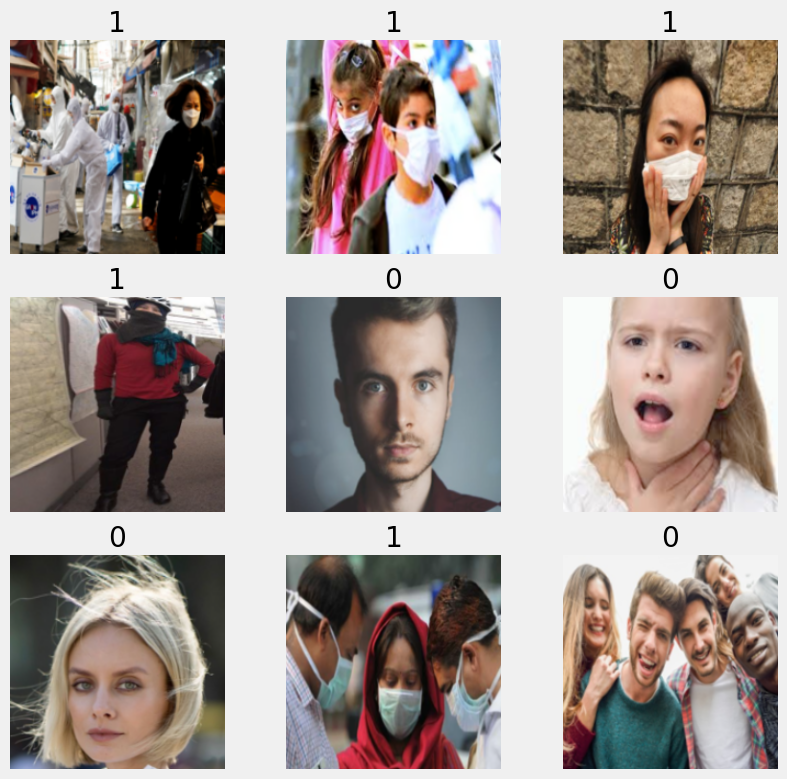

In [37]:
# We're using custom functions to get the input image and the label
from fastai.data.all import *
from fastai.vision.all import *
from fastai.vision.augment import Resize
from PIL import Image

def get_x(ID):
    # Load the image
    im = Image.open(f'/content/drive/My Drive/Colab Notebooks/Data/images/{ID}')

    # Convert grayscale image to RGB if it has only one channel
    if im.mode == 'L':
        im = im.convert('RGB')

    # Resize the image to a consistent size if needed
    im = im.resize((224, 224))

    # Return the image as a numpy array
    return np.array(im)

# And the label
def get_y(ID):
  label = df.loc[df.image == ID]['target'].values[0]
  return int(label)

# Get the list of Image IDS:
def get_im_ids(path):
  return df.image.values

# And build the datablock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_im_ids,
    get_x=get_x,
    get_y=get_y,
    splitter=IndexSplitter(np.argwhere(df['val'].values == 1)),
    batch_tfms=aug_transforms(size=224, min_scale=0.75),
    # Add Resize transform to ensure all images have the same size
    item_tfms=Resize((224, 224))
)
dls = dblock.dataloaders(
    Path(''),
    bs=16,
    seed=42,
    item_tfms = Resize(244),
    batch_tfms=[*aug_transforms(size=(244,244)),
                Normalize.from_stats(*imagenet_stats)],
    )
dls.show_batch()

In [38]:
# Create the learner
learn = cnn_learner(dls, resnet34)

In [ ]:
# train
learn.fine_tune(4)

In [ ]:
# Create a test dataloader and get predictions
tdl = learn.dls.test_dl(test['image'].values)
test_preds, test_labels = learn.get_preds(dl=tdl, reorder=False)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(test_labels, np.argmax(test_preds, axis=1))
print("Accuracy:", accuracy)

# Calculate AUC
auc = roc_auc_score(test_labels, test_preds[:, 1])  # Assuming test_preds contains probabilities, and 1 is the index for the positive class
print("AUC:", auc)

In [ ]:
# Make a submission dataframe
sub = pd.DataFrame({
    'image':test['image'],
    'target':[p[1] for p in test_preds.numpy()]
})
sub.head()

In [ ]:
sub.to_csv("/content/drive/My Drive/Colab Notebooks/Data/masked_submission2.csv", index=False)